# FINAL PROJECT




# Plant Disease classification

SAHIL THAKUR IN40151

DEBASHISH MISHRA IN40051

NANCY TYAGI IN40110

RIYA HASIJA IN40143

SASMITA SAMAL IN40160

# IMPORTING LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [2]:
len(os.listdir("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

WE HAVE 38 CLASSES OF PLANT LEAVES

In [3]:
train_datagen= ImageDataGenerator(zoom_range= 0.4,shear_range=0.4,horizontal_flip=True,preprocessing_function= preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [4]:
train = train_datagen.flow_from_directory(directory="New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         target_size=(256,256),
                                         batch_size=30)
val = val_datagen.flow_from_directory(directory="New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                         target_size=(256,256),
                                         batch_size=30)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
t_img, label = train.next()

# PLOTTING OF IMAGES

In [6]:
def plotImage(img_arr, label):
    
    for im , l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


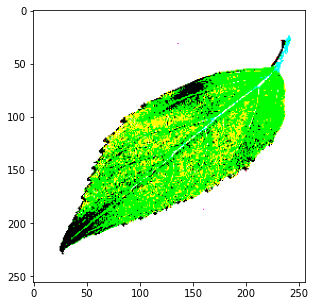

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


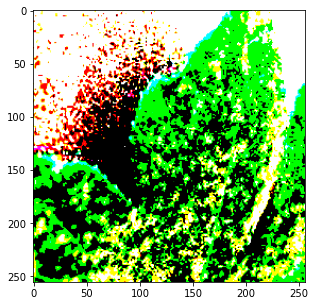

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


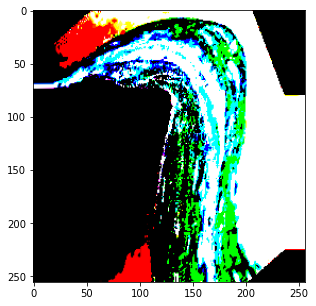

In [7]:
plotImage(t_img[:3], label[:3])

# BUILDING MODEL

In [8]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19

# BASE MODEL

In [9]:
base_model=VGG19(input_shape=(256,256,3), include_top = False)
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

TRANSFER THE LEARNING

In [10]:
for layer in base_model.layers:
    layer.trainable = False

ADDING FLATTEN AND DENSE LAYER TO BASE MODEL

In [11]:
X=Flatten()(base_model.output)
X=Dense(units= 38,activation='softmax')(X)
#CREATING OUR MODEL
model = Model(base_model.input,X)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

# COMPILE THE MODEL

In [13]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

C:\Users\SAHIL\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.1, patience =30,verbose=1)
mc = ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    patience=30,
                    verbose=1,
                    save_best_only=True)
cb=[es,mc]

In [15]:
his = model.fit(train,steps_per_epoch=16,
                          epochs=30,
                          verbose=1,
                          callbacks=cb,
                          validation_data=val,
                          validation_steps=30
                         )

Epoch 1/30
16/16 [==============================] - ETA: 0s - loss: 26.2176 - accuracy: 0.2125
Epoch 00001: val_accuracy improved from -inf to 0.38333, saving model to best_model.h5
16/16 [==============================] - 259s 17s/step - loss: 26.2176 - accuracy: 0.2125 - val_loss: 17.0662 - val_accuracy: 0.3833
Epoch 2/30
16/16 [==============================] - ETA: 0s - loss: 15.1922 - accuracy: 0.4417
Epoch 00002: val_accuracy improved from 0.38333 to 0.56444, saving model to best_model.h5
16/16 [==============================] - 258s 17s/step - loss: 15.1922 - accuracy: 0.4417 - val_loss: 9.9655 - val_accuracy: 0.5644
Epoch 3/30
16/16 [==============================] - ETA: 0s - loss: 12.7754 - accuracy: 0.5229
Epoch 00003: val_accuracy improved from 0.56444 to 0.69000, saving model to best_model.h5
16/16 [==============================] - 256s 17s/step - loss: 12.7754 - accuracy: 0.5229 - val_loss: 7.0586 - val_accuracy: 0.6900
Epoch 4/30
16/16 [==============================] -

In [18]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# ACCURACY GRAPH

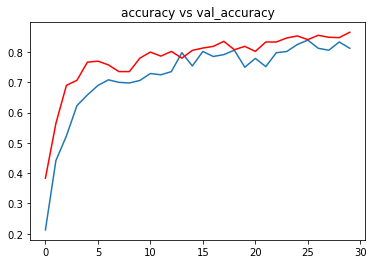

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('accuracy vs val_accuracy')
plt.show()

# LOSS GRAPH

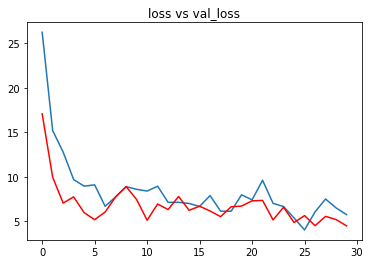

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs val_loss')
plt.show()

# load best model

In [46]:
# load best model
from keras.models import load_model
model_1 = load_model("best_model.h5")

acc = model_1.evaluate(val)[1]

print(f"The accuracy of our model is = {acc*100}%")

586/586 [==============================] - 3946s 7s/step - loss: 4.6796 - accuracy: 0.8611
The accuracy of our model is = 86.1085832118988%


# ACCURACY OF OUR MODEL IS 86%

In [37]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))

# PREDICTION

In [38]:
def prediction(path):
    img = load_img(path, target_size =(256,256))
    i = img_to_array(img)
    im = preprocess_input(i)
    imag=np.expand_dims(im, axis = 0)
    pred = np.argmax(model_1.predict(imag))
    
    print(f"The Image belongs to {ref[pred]}" )

In [45]:
path="test/test/AppleCedarRust1.JPG"
prediction(path)

The Image belongs to Apple___Cedar_apple_rust
